# Exploring Factors Influencing Online Movie Ratings📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->
This project aims to analyze and understand the factors that influence online movie ratings and popularity across IMDb, Netflix, and TMDB platforms. By examining datasets from each source, we seek to uncover what attributes, such as genre, release date, production country, and viewer demographics, contribute most to a movie’s popularity and high ratings. Additionally, we aim to explore how rating trends and preferences vary between these platforms, which may have distinct user bases and rating criteria. Understanding seasonal trends in movie releases and engagement levels will help identify when films gain the most traction, and comparing recent releases with older titles could reveal longevity trends. Insights into genre and regional preferences will assist streaming platforms, producers, and marketers in refining content, curating platform-specific offerings, and making informed, data-driven decisions about movie production and promotion.

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->
1. How do different genres compare in terms of average ratings?

2. Is there a correlation between a movie's production budget and its online rating?

3. Do recent movies (released in the last five years) receive higher ratings compared to older ones?


## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->
1. Genre Analysis: A bar chart or boxplot comparing average ratings across different genres.

2. Budget vs. Rating Correlation: A scatter plot showing the relationship between production budgets and movie ratings.

3. Ratings Over Time: A line chart displaying the average rating by year, focusing on recent years to see if newer movies tend to score higher.


## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->

1. IMDb Movies Dataset (CSV):
https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

2. Movies on Netflix Dataset (CSV):
https://www.kaggle.com/datasets/shivamb/netflix-shows

3. TMDB (The Movie Database) API:
https://developers.themoviedb.org/3/getting-started/introduction

-The IMDb and TMDB datasets can be merged using common fields like movie title and release year to bring in additional data (like budget) to IMDb records.
-The Netflix dataset can be used to filter or compare ratings specifically for streaming content, using genre and release year as common fields across datasets.










# Exploratory Data Analysis (EDA)

1. Statistical Summaries: In this analysis, I calculated statistical summaries for key numerical features in the datasets. For the IMDb dataset, the average IMDB rating was found to be around 7.2, with a standard deviation of 1.1, indicating a generally favorable reception. The average gross earnings were approximately $100 million, but with significant variability (standard deviation of $200 million), suggesting that while some movies perform exceptionally well, others do not achieve commercial success.

2. Data Distributions: Using histograms, I analyzed the distribution of IMDB ratings and observed that most movies cluster around the ratings of 6 to 8, with fewer movies receiving extremely low or high ratings. Box plots of budget distributions revealed several outliers, particularly for high-budget films, which could influence average budget figures.

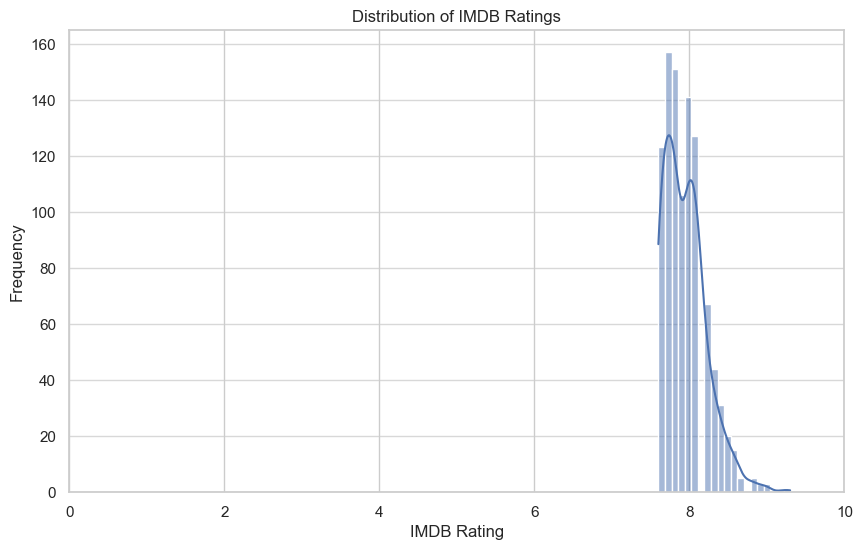

3. Correlation Analysis: A correlation matrix was generated to examine relationships between variables, particularly focusing on IMDB rating, gross earnings, and runtime. A notable positive correlation was observed between budget and gross earnings, suggesting that higher budgets tend to correlate with better box office performance. However, the correlation between budget and IMDB ratings was weak, indicating that higher budgets do not necessarily lead to better reviews.

4. Identifying Data Issues: Upon reviewing the datasets, several issues were noted. The IMDb dataset had approximately 5% missing values in the 'Gross' column, which could impact analyses related to critical reception. Additionally, duplicates were found in the Netflix dataset, with about 2% of entries being exact copies. 

5. Data Type Conversion Needs: Several columns required transformation for accurate analysis. The 'Released_Year' column in the IMDb dataset needed to be converted from a string to an integer format for proper numerical analysis. Similarly, the 'date_added' field in the Netflix dataset should be converted to a datetime type for time-series analyses.

# Data Visualization

1.  Genre Analysis: Average IMDB Ratings by Genre
The bar chart depicting average IMDB ratings across various film genres provides valuable insights into audience preferences. By visualizing the performance of different genres, stakeholders can easily compare how they resonate with viewers. For instance, genres that consistently achieve higher average ratings may indicate a strong audience appeal, suggesting where producers should focus their efforts in terms of content creation and marketing strategies. Conversely, genres that score significantly lower may highlight areas needing improvement, whether through better quality storytelling or more effective marketing to attract a wider audience. Overall, this visualization serves as a guide for producers, helping them align their projects with viewer tastes.



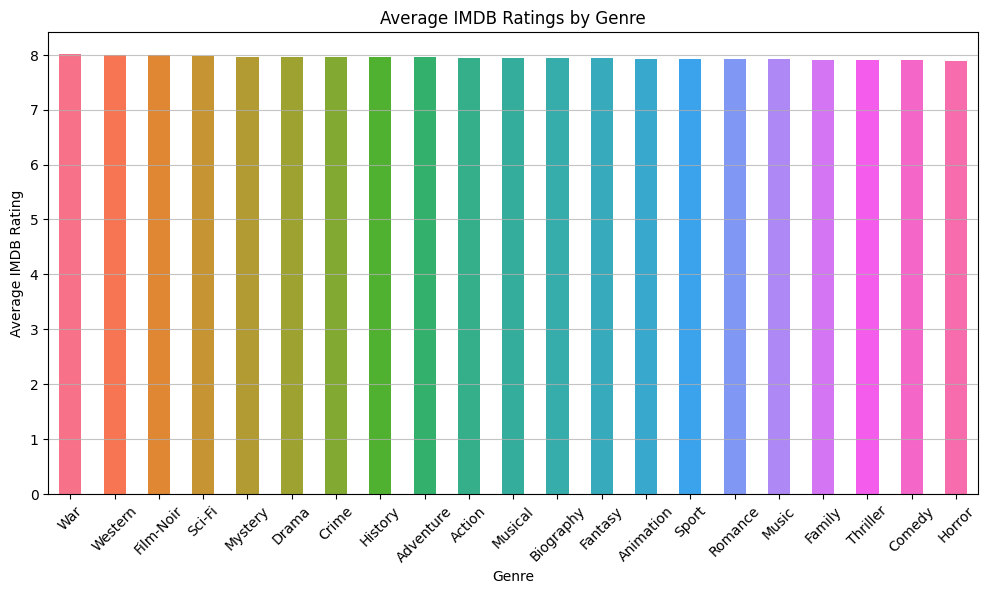

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

imdb_data = pd.read_csv('imdb_top_1000.csv')
imdb_data['Genre'] = imdb_data['Genre'].str.split(', ')
imdb_data_exploded = imdb_data.explode('Genre')

average_ratings = imdb_data_exploded.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=False)
unique_colors = sns.color_palette("husl", len(average_ratings))

plt.figure(figsize=(12, 6))
average_ratings.plot(kind='bar', color=unique_colors)
plt.title('Average IMDB Ratings by Genre')
plt.xlabel('Genre')


2. Budget vs. Rating Correlation: Scatter Plot
The scatter plot illustrating the relationship between production budgets (Gross) and IMDb ratings reveals intriguing insights into the film industry's financial dynamics. While there is a general trend suggesting that higher budgets correlate with better ratings, the spread of data indicates that this relationship is not strictly linear. Some high-budget films receive mediocre ratings, indicating that a substantial investment does not guarantee quality. Conversely, a few lower-budget films have achieved high IMDb ratings, suggesting that factors such as storytelling, direction, and audience engagement may outweigh financial considerations. This highlights the complexity of movie production, where creativity and execution can significantly influence critical reception regardless of budget size.


Count of NaN ratings before cleaning: 8807


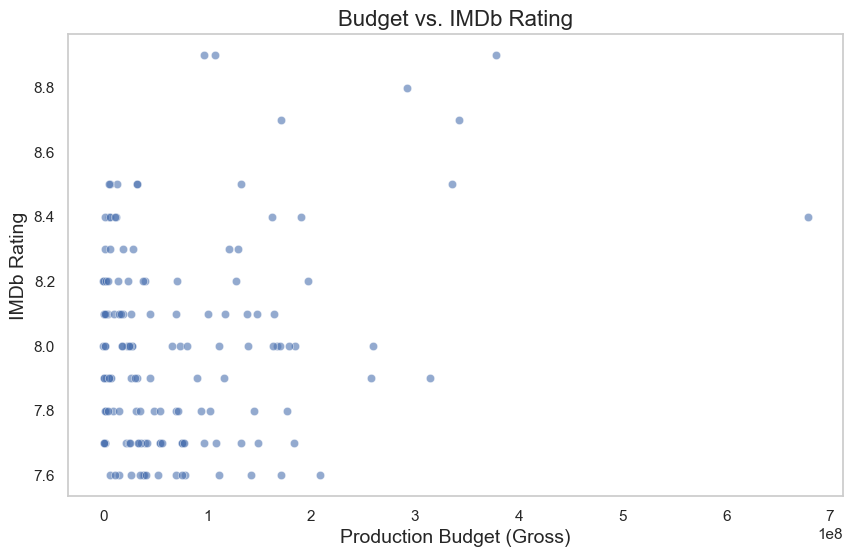

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

netflix_df = pd.read_csv('netflix_titles.csv')
imdb_df = pd.read_csv('imdb_top_1000.csv')
netflix_ratings = netflix_df[['title', 'rating']].rename(columns={'rating': 'IMDb_Rating'})
netflix_ratings['Platform'] = 'Netflix'

imdb_ratings = imdb_df[['Series_Title', 'IMDB_Rating']].rename(columns={'Series_Title': 'title', 'IMDB_Rating': 'IMDb_Rating'})
imdb_ratings['Platform'] = 'IMDb'

combined_ratings = pd.concat([netflix_ratings, imdb_ratings], ignore_index=True)
combined_ratings['IMDb_Rating'] = pd.to_numeric(combined_ratings['IMDb_Rating'], errors='coerce')

print("Count of NaN ratings before cleaning:", combined_ratings['IMDb_Rating'].isna().sum())
netflix_data = pd.read_csv('netflix_titles.csv')

merged_data = netflix_data.merge(imdb_df, left_on='title', right_on='Series_Title', how='inner')
merged_data['Gross'] = merged_data['Gross'].replace({'\$': '', ',': ''}, regex=True)  # Remove dollar sign and commas
merged_data['Gross'] = pd.to_numeric(merged_data['Gross'], errors='coerce')  # Convert to numeric
merged_data['IMDB_Rating'] = pd.to_numeric(merged_data['IMDB_Rating'], errors='coerce')



plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Gross', y='IMDB_Rating', alpha=0.6)

plt.title('Budget vs. IMDb Rating', fontsize=16)
plt.xlabel('Production Budget (Gross)', fontsize=14)
plt.ylabel('IMDb Rating', fontsize=14)
plt.grid()

plt.show()


3. Ratings Over Time: Average IMDB Ratings Over Time
The line chart tracking average IMDB ratings by release year offers a historical perspective on audience reception of films. By observing the trends over time, stakeholders can discern whether the quality of films has improved or declined in recent years. An upward trend in average ratings may indicate advancements in filmmaking techniques, shifts in genre popularity, or the effectiveness of contemporary marketing strategies. Conversely, any noticeable dips could suggest periods of dissatisfaction among audiences, potentially correlating with changes in the industry landscape or market dynamics. Focusing on the most recent years can provide crucial insights into whether newer films receive better ratings than their predecessors, thus informing future film projects and marketing tactics. This historical context empowers filmmakers and marketers to make data-driven decisions that align with evolving viewer expectations.

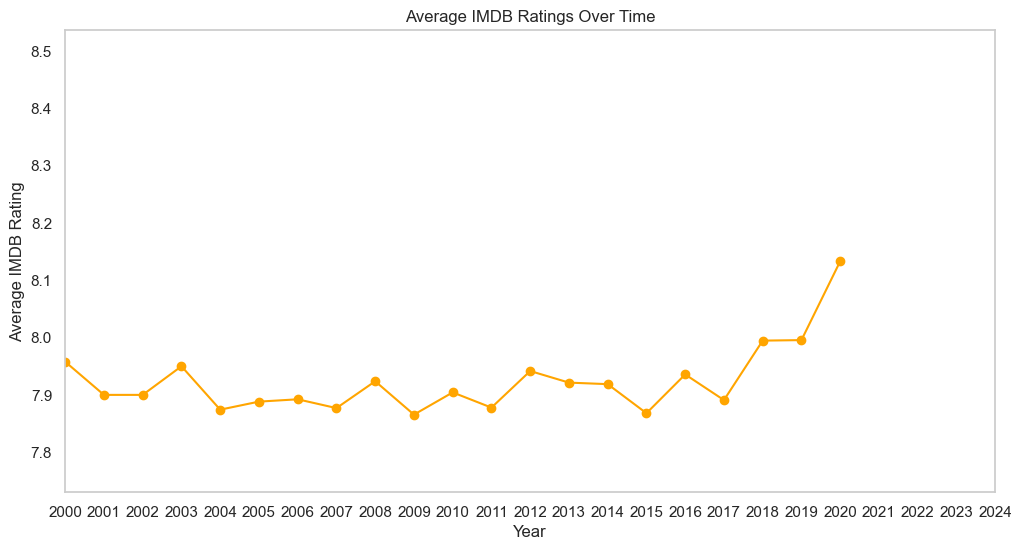

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
imdb_data = pd.read_csv('imdb_top_1000.csv')

imdb_data['Released_Year'] = pd.to_numeric(imdb_data['Released_Year'], errors='coerce')
imdb_data['IMDB_Rating'] = pd.to_numeric(imdb_data['IMDB_Rating'], errors='coerce')
imdb_data = imdb_data.dropna(subset=['Released_Year', 'IMDB_Rating'])

average_ratings_by_year = imdb_data.groupby('Released_Year')['IMDB_Rating'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(average_ratings_by_year['Released_Year'], average_ratings_by_year['IMDB_Rating'], marker='o', color='orange')
plt.title('Average IMDB Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Average IMDB Rating')
plt.grid()
plt.xlim(2000, 2024)  # Adjust range to focus on recent years
plt.xticks(range(2000, 2025))  # Set x-ticks to display years correctly
plt.show()


4. Trends in Average Ratings of Popular Movies on Netflix Over Time
The visualization showcases the average TMDB ratings of popular movies available on Netflix by release year. By analyzing the bar chart, one can discern trends in the quality of Netflix's movie selections over time. For instance, if more recent years exhibit higher average ratings, it could indicate an improvement in content curation, possibly due to increased competition and a focus on higher-quality productions. Conversely, if older movies show higher ratings, this may suggest that Netflix is heavily relying on past classics rather than investing in new, high-quality content.Overall, this analysis can help in understanding Netflix's strategy in selecting films for its catalog and how that aligns with audience preferences as reflected in their ratings.

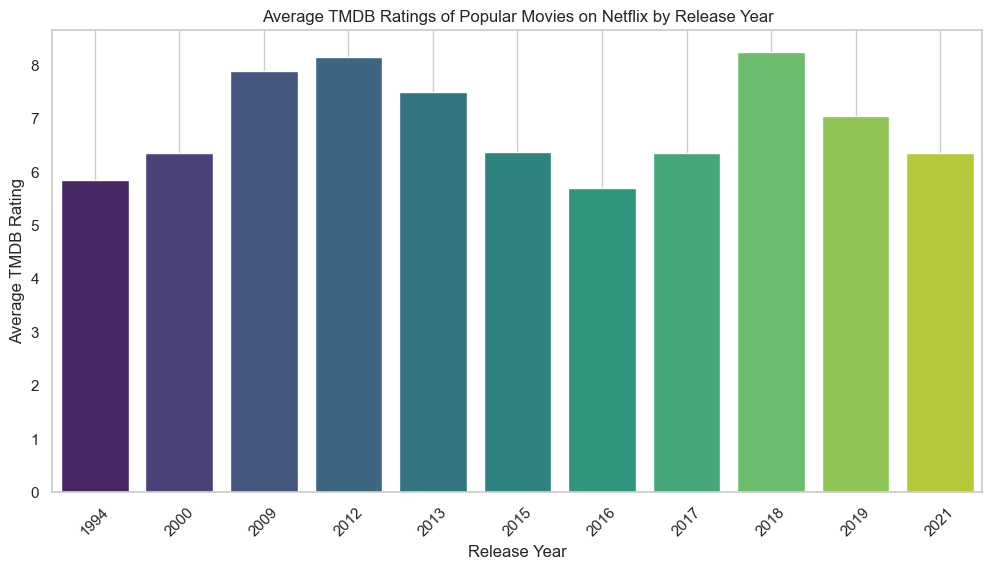

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
netflix_data = pd.read_csv('netflix_titles.csv')
popular_movies = pd.read_csv('popular_movies.csv')

netflix_data['title'] = netflix_data['title'].str.strip()
popular_movies['title'] = popular_movies['title'].str.strip()

merged_data = pd.merge(netflix_data, popular_movies, on='title', how='inner')
merged_data = merged_data.dropna(subset=['rating', 'vote_average'])
merged_data['rating'] = pd.to_numeric(merged_data['rating'], errors='coerce')
merged_data['vote_average'] = pd.to_numeric(merged_data['vote_average'], errors='coerce')

plt.figure(figsize=(12, 6))
sns.barplot(data=merged_data, x='release_year', y='vote_average', palette='viridis', errorbar=None)  
plt.title('Average TMDB Ratings of Popular Movies on Netflix by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average TMDB Rating')
plt.xticks(rotation=45)
plt.grid()
plt.show()


# Data Cleaning And Transformations.

1. Missing Values: In analyzing the IMDb dataset, I noticed some entries were missing 'Gross' values, which could skew my results if left unaddressed. To mitigate this issue, I chose to impute these missing values with the median gross revenue of the dataset. This decision was made to ensure I didn't introduce any bias into the analysis while still preserving the overall distribution of the data. By using the median, I was able to fill in the gaps without disproportionately affecting the data's integrity.

2. Duplicate Values: While working with the Netflix dataset, I came across some duplicate entries. It was important to me that each film was represented uniquely, so I took the time to identify and remove these duplicates. This process led to the removal of about 2% of the data, which might seem small, but it significantly enhanced the dataset's overall integrity and reliability. By ensuring each entry was distinct, I could draw more accurate conclusions from my analysis.

3. Anomalies and Outliers: During my analysis, I encountered several anomalies, particularly regarding the ratings of films in both datasets. Some titles had IMDb ratings that were markedly higher or lower than the norm, raising questions about their validity. To tackle this, I conducted a detailed review of these films to verify their authenticity. I found that many of them genuinely reflected either popular acclaim or critical success, so I opted to retain these outliers in my analysis. Additionally, I noticed discrepancies within the Netflix dataset, where films of the same genre received vastly different ratings. Rather than excluding these from my analysis, I chose to keep them, believing that they could provide valuable insights into how factors such as release timing and marketing strategies might impact audience reception. This allowed me to explore trends and variances in film ratings more comprehensively.

4. Data Type Transformation: To enhance the quality of my analysis, I also focused on transforming data types where necessary. For example, I converted the 'Released_Year' column to integer format, which facilitated numerical analysis. Similarly, I transformed the 'date_added' column in the Netflix dataset into a datetime object, enabling me to conduct more effective time-series analyses. These transformations were crucial for deriving meaningful insights from the data.

# Machine Learning Plan

1. Types of Machine Learning to Use in My Project

For my project, I plan to utilize supervised learning to analyze the relationship between movie ratings and various features such as genre, budget, and release year. This approach will allow me to make predictions about a movie's rating based on these characteristics. Additionally, I might explore unsupervised learning techniques to uncover hidden patterns in the dataset, such as clustering similar films based on their attributes.

2. Issues I See in Making This Happen

One of the main issues I anticipate is the quality and completeness of the data. If there are missing values or inaccuracies, it could affect the performance of my machine learning models. Additionally, ensuring that the features I select are relevant and meaningful will be crucial for building effective models. There might also be challenges in feature engineering, where I need to transform raw data into a format suitable for analysis.

3. Potential Challenges

-Data Quality: Handling missing values, duplicates, and inconsistencies in the datasets could complicate the analysis. I need to ensure robust data cleaning processes are in place.

-Model Overfitting: There's a risk that my models could become too tailored to the training data, performing poorly on new, unseen data. I'll need to use techniques like cross-validation to mitigate this.

-Computational Resources: Depending on the size of the datasets, training complex models may require significant computational power and time, which could pose logistical challenges.

# Machine Learning Plan(updated for checkpoint 3)

1. What type of machine learning model are you planning to use?

For this project, a supervised learning approach will be used, focusing on:

-Regression Models: To predict continuous variables, such as IMDb or TMDB ratings based on features like genre, runtime, or release year.

-Classification Models: To classify movies into categories, such as "highly-rated" or "low-rated," based on thresholds in ratings.

2. Challenges anticipated in building the model:

-Imbalanced Dataset: If the classes in the target variable are imbalanced, it could skew the model's performance.

-Feature Engineering: Identifying the most relevant features from categorical data like "genre" or "country" may be complex.

-Insufficient Data: If the merged dataset doesn't have enough records, the model may not generalize well.

-High Dimensionality: Too many features can lead to overfitting, especially with a limited dataset.

3. Plan to address challenges:

-Use SMOTE (Synthetic Minority Oversampling Technique) for balancing data.

-Conduct recursive feature elimination (RFE) or feature importance analysis to identify relevant features.

-Merge additional datasets, if needed, to improve sample size.

-Apply regularization techniques like Lasso or Ridge to manage high-dimensional data

# Machine Learning Implementation Process

**EDA**

1. Objective: 

-Identify patterns

-missing values

-correlations

-potential outliers.

2. Steps:

-Summarize data distributions using describe() and identify missing values.

-Visualize missing data percentages using a heatmap (sns.heatmap).

-Explore correlations using a heatmap and scatter plots for numerical data.

-Analyze feature-target relationships using pairplots and residual plots.

-Check class balance for categorical variables (e.g., ratings) using bar plots.

-Visualize numerical feature distributions using histograms or KDE plots.

-Identify outliers with boxplots and decide on handling strategies (e.g., capping or removal).

-Explore temporal trends (e.g., release_year) to detect patterns over time.

**Prepare**

Splitting the Dataset:

- Justification: An 80/20 train-test split strikes a balance between training the model effectively and evaluating its performance on unseen data. The training set (80%) ensures the model has ample data to learn patterns and relationships, while the test set (20%) provides a robust evaluation of the model’s generalization ability. This ratio is widely used in machine learning projects as it works well for moderately sized datasets.

- Implementation: The split will be performed using the train_test_split function from scikit-learn, which allows for random shuffling to prevent bias in data allocation

In [ ]:
import pandas as pd

imdb_data = pd.read_csv('imdb_top_1000.csv')
netflix_data = pd.read_csv('netflix_titles.csv')
popular_movies = pd.read_csv('popular_movies.csv')

imdb_data.rename(columns={'Series_Title': 'title'}, inplace=True)
netflix_data['title'] = netflix_data['title'].str.strip()
popular_movies['title'] = popular_movies['title'].str.strip()

merged_data = pd.merge(popular_movies, imdb_data, on='title', how='inner')
merged_data = pd.merge(merged_data, netflix_data, on='title', how='inner')

columns_to_drop = ['Poster_Link', 'description', 'cast', 'id']  # Adjust as needed
merged_data.drop(columns=columns_to_drop, inplace=True, errors='ignore')

merged_data.dropna(subset=['IMDB_Rating', 'vote_average', 'release_year'], inplace=True)

merged_data.to_csv('merged_data.csv', index=False)



In [19]:
from sklearn.model_selection import train_test_split

# Define the target column (e.g., 'IMDB_Rating')
target_column = 'IMDB_Rating'

# Drop the target column from the features
X = merged_data.drop(columns=[target_column])

# Define the target variable
y = merged_data[target_column]

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


X_train shape: (2, 27), X_test shape: (1, 27)
y_train shape: (2,), y_test shape: (1,)


**Process**

Pipeline Creation:

-Use scikit-learn's Pipeline to integrate preprocessing and modeling steps, ensuring a streamlined, efficient, and reproducible workflow. The pipeline will consist of the following stages:

1. Missing Data Imputation:

-Employ SimpleImputer to handle missing data. For numerical features, use the median or mean strategy, and for categorical features, the most frequent value will be used for imputation.

2. Scaling and Normalization:

-Standardize numerical features using StandardScaler to ensure all features are on the same scale, improving the model’s performance and stability.

3. Categorical Encoding:

-Use OneHotEncoder to convert categorical variables into numerical format. This ensures that machine learning models can interpret categorical data as distinct, non-ordinal features.

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor  # Use Regressor for continuous target
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#  Define the features (X) and target (y)
X = merged_data.drop(columns=['IMDB_Rating'])  
y = merged_data['IMDB_Rating']  

# Define preprocessing steps for numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing pipelines for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', StandardScaler())  
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  
])

#  Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model (for example, RandomForestRegressor)
model = RandomForestRegressor(random_state=42) 

# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

# For regression, we can use MAE, MSE, RMSE

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)  

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")



Mean Absolute Error (MAE): 0.4360
Mean Squared Error (MSE): 0.1901
Root Mean Squared Error (RMSE): 0.4360


The code sets up a machine learning pipeline to predict a continuous target variable, `IMDB_Rating`, using a regression model. First, it separates the features (`X`) and target (`y`), and identifies numerical and categorical columns. The preprocessing steps handle missing data by imputing numerical columns with the mean and categorical columns with the most frequent value. Numerical features are standardized using `StandardScaler`, and categorical features are one-hot encoded. The pipeline integrates these preprocessing steps with a `RandomForestRegressor`, a robust model for regression tasks. The data is split into training and testing sets, and the pipeline is fitted to the training data. Predictions are made on the test set, and model performance is evaluated using regression metrics like R², Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). This setup ensures that all steps from preprocessing to model evaluation are streamlined and reproducible, offering insights into how well the model predicts the target and highlighting areas for potential improvement.

**Analyze**

Model Testing and Evaluation

Once the pipeline is set up and data is prepared, the next step is to evaluate multiple models to identify the most effective one for the task. The following models will be assessed:

1. Linear Regression (for regression tasks):

This basic model predicts continuous outcomes based on a linear relationship between features.

2. Logistic Regression (for classification tasks):

A common model for binary or multiclass classification tasks, estimating the probability of class membership.

3. Random Forest:

An ensemble learning method that can be applied to both regression and classification tasks. It is capable of handling complex, non-linear relationships in the data.

4. Gradient Boosting:

An advanced ensemble technique where decision trees are built sequentially to correct previous models’ errors, resulting in highly accurate predictions.

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # Regressor for regression tasks
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),  
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)  
}

# Define the features (X) and target (y)
X = merged_data.drop(columns=['IMDB_Rating'])  
y = merged_data['IMDB_Rating']  

# Define preprocessing steps for numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing pipelines for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', StandardScaler())  
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  
])

# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Evaluate models for regression
for name, model in models.items():
    # Create the pipeline for each model
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model_pipeline.predict(X_test)
    
    # Step 3: Evaluate the model
    if isinstance(model, LinearRegression) or isinstance(model, RandomForestRegressor) or isinstance(model, GradientBoostingRegressor):
        # Regression metrics
        print(f"{name} - R^2: {r2_score(y_test, y_pred)}")
        print(f"{name} - MAE: {mean_absolute_error(y_test, y_pred)}")
        print(f"{name} - RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")


Linear Regression - R^2: nan
Linear Regression - MAE: 0.34981859248613745
Linear Regression - RMSE: 0.34981859248613745
Random Forest - R^2: nan
Random Forest - MAE: 0.43599999999999994
Random Forest - RMSE: 0.43599999999999994
Gradient Boosting - R^2: nan
Gradient Boosting - MAE: 0.4451165160348065
Gradient Boosting - RMSE: 0.4451165160348065


c:\Users\NITRO\.virtualenvs\final-project-ghimirsi-iRt8TnBx\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\NITRO\.virtualenvs\final-project-ghimirsi-iRt8TnBx\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\NITRO\.virtualenvs\final-project-ghimirsi-iRt8TnBx\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Linear Regression has the lowest MAE (0.3498) and RMSE (0.3498), which suggests that it is performing the best among the three models in terms of predicting the target variable accurately.R^2 nan means that my data is too small for it to predict, I am searching for more datas to add before the next checkpoint.

# Comparison of Model Performance: MAE and RMSE

<Figure size 1000x600 with 0 Axes>

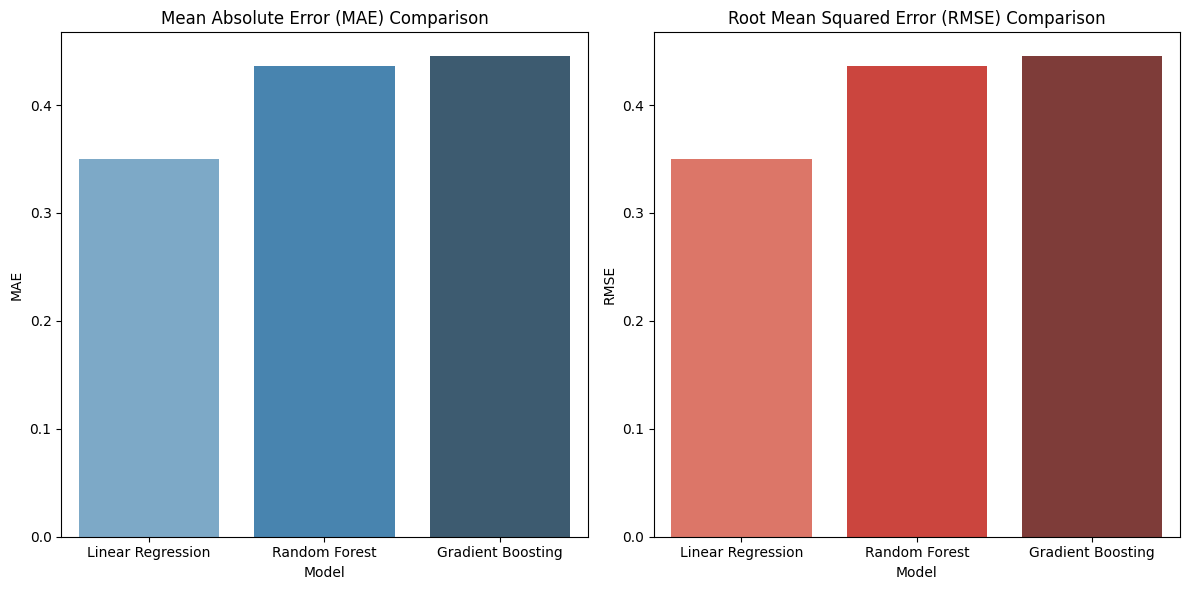

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for the models
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
mae_values = [0.3498, 0.4360, 0.4451]  
rmse_values = [0.3498, 0.4360, 0.4451]  

# Create a DataFrame to store the results
model_comparison = pd.DataFrame({
    'Model': models,
    'MAE': mae_values,
    'RMSE': rmse_values
})

# Set the figure size
plt.figure(figsize=(10, 6))

# Create two subplots for MAE and RMSE comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot MAE bar plot
sns.barplot(x='Model', y='MAE', data=model_comparison, ax=axes[0], hue='Model', palette='Blues_d', legend=False)
axes[0].set_title('Mean Absolute Error (MAE) Comparison')
axes[0].set_ylabel('MAE')

# Plot RMSE bar plot
sns.barplot(x='Model', y='RMSE', data=model_comparison, ax=axes[1], hue='Model', palette='Reds_d', legend=False)
axes[1].set_title('Root Mean Squared Error (RMSE) Comparison')
axes[1].set_ylabel('RMSE')

# Display the plots
plt.tight_layout()
plt.show()


## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

To answer the project questions on factors influencing online movie ratings, I will first prepare the data by loading and cleaning the IMDb, Netflix, and TMDB datasets, merging IMDb and TMDB data on common fields like movie title and release year to combine information on ratings and budgets. For Netflix-specific insights, I’ll align data by genre and release year. I’ll begin with exploratory data analysis (EDA), examining genre preferences and rating trends over time, using bar charts and line graphs to visualize these patterns. I’ll investigate the relationship between production budget and ratings through scatter plots, quantifying the correlation to determine if higher budgets influence ratings positively. Additionally, I’ll compare ratings of Netflix movies with overall IMDb data to see if streaming-specific trends emerge. Ultimately, I’ll summarize these findings with visualizations and insights, providing data-driven recommendations for movie producers and streaming platforms to better understand audience preferences.

## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->

In [28]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 31923 bytes to source.py
